In [1]:
# Required imports
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix

In [2]:
# Importing data
df = pd.read_csv('csv/suv_data.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Checking for possible nulls and data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
# Checking how many unique classes to be predicted
df['Purchased'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

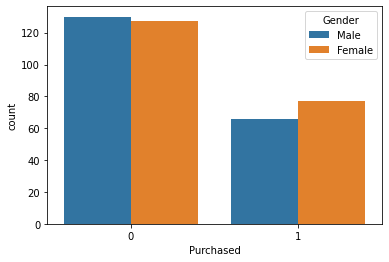

In [6]:
# Generate count plot for each Gender
sns.countplot(x = 'Purchased',data = df, hue='Gender')

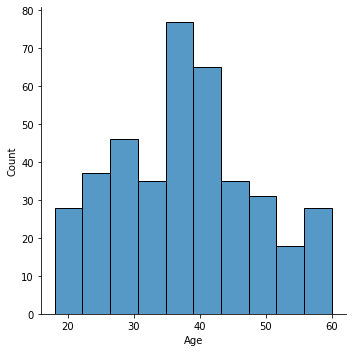

In [7]:
# Generate age distribution plot
sns.displot(df['Age'])

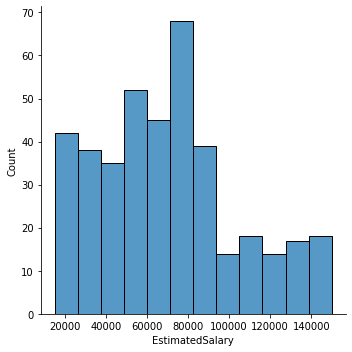

In [8]:
# Generate EstimatedSalary distribution plot
sns.displot(df['EstimatedSalary'])

In [9]:
# Applying one hot encoding to Gender Field
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [10]:
# Dropping User ID column as it is not relevant for prediction
del df['User ID']
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [11]:
# Splitting data into training and testing set
X = df.drop('Purchased', axis = 1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [12]:
# Scaling data to improve training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Fitting model to training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Generating predictions
y_predicted = lr.predict(X_test)

In [15]:
# Generating results
print(classification_report(y_test, y_predicted))
print(f'Accuracy score: {accuracy_score(y_test, y_predicted)}')
print(f'Precision score: {precision_score(y_test, y_predicted)}')
print(f'Recall score: {recall_score(y_test, y_predicted)}')

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.85      0.85      0.85        13

    accuracy                           0.90        40
   macro avg       0.89      0.89      0.89        40
weighted avg       0.90      0.90      0.90        40

Accuracy score: 0.9
Precision score: 0.8461538461538461
Recall score: 0.8461538461538461
